## Observations and Insights

- There is a positive correlation between the mouse weight to the tumor volume, the higher the mouse weight, the tumor volume tend to be larger. 
- The tumor volume was reduced throughout the lifetime of the mouse with the Capomolin regimen, and in all other regimens. 
- The female and male mouse proportions are equal for the entire population, thereore the data does not reflect the tumor volume affect based on gender. 
- The final tumor volume is smaller for the Capomolin regimen compare to the Ceftamin regimen, the tumor volume has a higher chance to be controlled with the Capomolin regimen. 

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [2]:
# Combine the data into a single dataset
data_set = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer", suffixes = ('_mouse','_study'))
data_set.head(50)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

single_drug = []

# Running through each of the drug regimens 
drug_regimen = data_set["Drug Regimen"].unique()
for drug in drug_regimen:
    single_drug.append(data_set.loc[data_set["Drug Regimen"] == drug, :])

In [4]:
# Define statistical variables
drug_regimen_name = []
tumor_mean = []
tumor_median = []
tumor_variance =[]
tumor_stdev = []
tumor_SEM = []
data_length = []

# Finding the statistical variables based on the drug regimen
for i in range(0,len(drug_regimen)):
    drug_regimen_name.append(drug_regimen[i])
    tumor_mean.append(single_drug[i]["Tumor Volume (mm3)"].mean())
    tumor_median.append(single_drug[i]["Tumor Volume (mm3)"].median())
    tumor_variance.append(single_drug[i]["Tumor Volume (mm3)"].var())
    tumor_stdev.append(single_drug[i]["Tumor Volume (mm3)"].std())
    tumor_SEM.append(single_drug[i]["Tumor Volume (mm3)"].sem())
    data_length.append(single_drug[i]["Tumor Volume (mm3)"].count())

# Creating title list for the statistical table
column_name_list =["Drug Regimen",
                   "Tumor Mean",
                   "Tumor Median",
                   "Tumor Variance", 
                   "Tumor Standard Deviation", 
                   "Tumor SEM"]

# Combining the title list with the data list by zip them together 
summary_tumor_table = pd.DataFrame(list(zip(drug_regimen_name, tumor_mean, tumor_median, tumor_variance, tumor_stdev, tumor_SEM)), 
                                   columns = column_name_list)
summary_tumor_table.set_index("Drug Regimen")


,Tumor Mean,Tumor Median,Tumor Variance,Tumor Standard Deviation,Tumor SEM
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884


## Bar plots

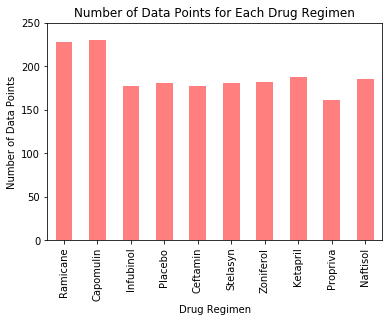

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
# Generate table of the number of data points based on drug regimen used 
regimen_data_points_df = pd.DataFrame({"Drug Regimen":drug_regimen,"Number of Data Points":data_length,})
regimen_data_points_df.set_index("Drug Regimen", drop = True)

# Plotting 
regimen_data_points_df.plot(kind = "bar",x = 'Drug Regimen', y = 'Number of Data Points',
                            color = "red", alpha = 0.5, 
                            title = "Number of Data Points for Each Drug Regimen",
                            xlim =(-0.75, len(data_length)-0.25), ylim = (0, max(data_length)+20),
                            legend = False)
plt.ylabel("Number of Data Points")
plt.show()


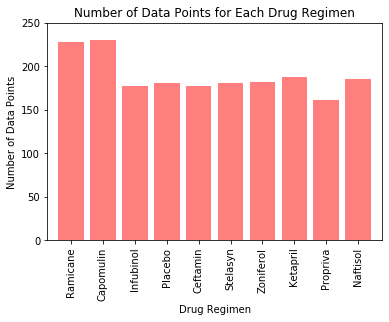

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

x_axis = np.arange(len(data_length))
plt.bar(x_axis, data_length, facecolor='red', alpha= 0.5, align ='center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,drug_regimen, rotation = 'vertical')
plt.xlim(-0.75,len(data_length)-0.25)
plt.ylim(0, max(data_length)+20)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Number of Data Points for Each Drug Regimen")
plt.show()

## Pie plots

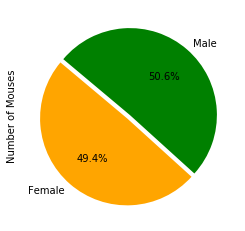

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Group the mouse based on gender, and count the female and male mouses
mice_gender = data_set.groupby(["Sex"])
female_mice = mice_gender.count()["Mouse ID"]["Female"]
male_mice = mice_gender.count()["Mouse ID"]["Male"]
total_mice = female_mice + male_mice
female_percentage = round(female_mice/total_mice*100,2)
male_percentage = round(male_mice/total_mice*100,2)
# Summarizing the data in a DataFrame and plotting 
mice_gender_df = pd.DataFrame({"Gender":["Female", "Male"],"Number of Mouses": [female_mice, male_mice]})
mice_gender_df.plot(kind = "pie", x = "Gender", y = "Number of Mouses", 
                    labels = ["Female","Male"], colors = ["orange","green"],
                    explode = (0.05, 0),startangle = 140, legend = False,
                    autopct='%1.1f%%')
plt.show()



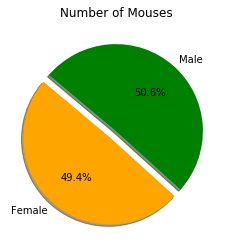

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_gender = data_set.groupby(["Sex"])
female_mice = mice_gender.count()["Mouse ID"]["Female"]
male_mice = mice_gender.count()["Mouse ID"]["Male"]
plt.pie([female_mice, male_mice],explode = (0.1, 0), autopct='%1.1f%%',
        labels = ["Female","Male"], colors = ['orange','green'],
        shadow = True, startangle = 140)
plt.title("Number of Mouses", loc = "center")
plt.show()

## Quartiles, outliers and boxplots

In [9]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Define the four most promissing drug regimen (based on the information provided)
four_drug_regimen = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
# Group the data by Mouse ID and find the final time stamp for each mouse ID
unique_ID = data_set.groupby(["Mouse ID"])
final_timepoint = pd.DataFrame(unique_ID["Timepoint"].max())
final_timepoint.head()

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30


In [10]:
# Define variables 
mouse_ID = []
final_tumor_data = []
# Find the final tumor volume for each mouse in the specified regimen
for regimen_name in four_drug_regimen:
    regimen_data = data_set["Drug Regimen"] == regimen_name 
    regimen_data_df = data_set[regimen_data] 
    final_timepoint_data_df = regimen_data_df.merge(final_timepoint, on = ("Mouse ID","Timepoint"))
    final_tumor_data.append(final_timepoint_data_df["Tumor Volume (mm3)"])

final_tumor_data  

[0     23.343598
 1     28.484033
 2     28.430964
 3     30.485985
 4     31.023923
 5     31.896238
 6     32.377357
 7     33.329098
 8     34.455298
 9     37.311846
 10    36.041047
 11    37.074024
 12    38.846876
 13    38.939633
 14    38.982878
 15    38.753265
 16    38.125164
 17    39.952347
 18    40.658124
 19    40.159220
 20    40.728578
 21    41.483008
 22    41.581521
 23    47.685963
 24    46.539206
 Name: Tumor Volume (mm3), dtype: float64,
 0     22.050126
 1     29.128472
 2     30.276232
 3     30.564625
 4     30.638696
 5     31.560470
 6     31.095335
 7     33.397653
 8     32.978522
 9     33.562402
 10    36.134852
 11    38.810366
 12    37.225650
 13    36.374510
 14    36.561652
 15    37.311236
 16    38.342008
 17    38.407618
 18    40.659006
 19    40.667713
 20    45.220869
 21    43.047543
 22    43.419381
 23    43.166373
 24    44.183451
 Name: Tumor Volume (mm3), dtype: float64,
 0     67.973419
 1     65.525743
 2     57.031862
 3     66.083

In [12]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in range(0,4):
    quartiles = final_tumor_data[i].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"-----------------------------------------------")
    print(f"{four_drug_regimen[i]} Regimen")
    print(f"-----------------------------------------------")
    print(f"The lower quartile of Tumor Volume is: {round(lowerq,2)} mm3")
    print(f"The upper quartile of Tumor Volume is: {round(upperq,2)} mm3")
    print(f"The interquartile range of Tumor Volume is: {round(iqr,2)} mm3")
    print(f"The the median of Tumor Volume is: {round(quartiles[0.5],2)} mm3")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {round(lower_bound,2)} could be outliers.")
    print(f"Values above {round(upper_bound,2)} could be outliers.")
    lower_outlier = final_tumor_data[i][final_tumor_data[i]< lower_bound].count()
    upper_outlier = final_tumor_data[i][final_tumor_data[i]> upper_bound].count()

    print(f"There are {lower_outlier + upper_outlier} outliers.\n")

-----------------------------------------------
Capomulin Regimen
-----------------------------------------------
The lower quartile of Tumor Volume is: 32.38 mm3
The upper quartile of Tumor Volume is: 40.16 mm3
The interquartile range of Tumor Volume is: 7.78 mm3
The the median of Tumor Volume is: 38.13 mm3
Values below 20.7 could be outliers.
Values above 51.83 could be outliers.
There are 0 outliers.

-----------------------------------------------
Ramicane Regimen
-----------------------------------------------
The lower quartile of Tumor Volume is: 31.56 mm3
The upper quartile of Tumor Volume is: 40.66 mm3
The interquartile range of Tumor Volume is: 9.1 mm3
The the median of Tumor Volume is: 36.56 mm3
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
There are 0 outliers.

-----------------------------------------------
Infubinol Regimen
-----------------------------------------------
The lower quartile of Tumor Volume is: 54.05 mm3
The upper quartile of 

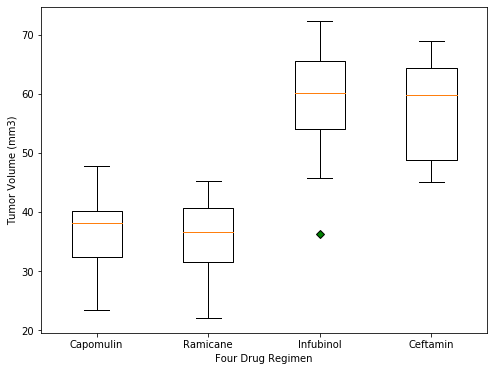

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Create the data set of the final tumor data for specified drug regimen
x_axis = np.arange(1,5)
four_data_sets = []
for i in range(0,4):
    four_data_sets.append(final_tumor_data[i])

# Plotting setup
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot()

# Create the boxplot
ax.boxplot(four_data_sets,flierprops = dict(markerfacecolor = 'g',marker = 'D'))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,four_drug_regimen)
plt.xlabel("Four Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


## Line and scatter plots

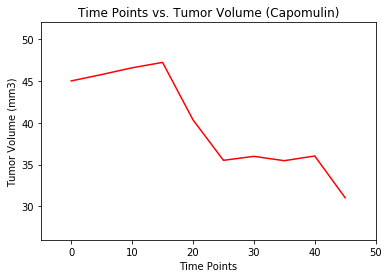

In [14]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_data = data_set["Drug Regimen"] == 'Capomulin'
capomulin_data_df = data_set[capomulin_data]
# Find a random mouse in the data set 
capomulin_mice_ID = capomulin_data_df["Mouse ID"].unique()
random_mice = random.randrange(0, len(capomulin_mice_ID),1)
capomulin_mice = capomulin_mice_ID[random_mice]
# DataFrame containing only one mouse data
one_mice_data = capomulin_data_df["Mouse ID"] == capomulin_mice
one_mice_df = capomulin_data_df[one_mice_data]
# x, y of the plot
time_points = one_mice_df["Timepoint"]
capomulin_tumor_volume = one_mice_df["Tumor Volume (mm3)"]
# Plotting
plt.plot(time_points, capomulin_tumor_volume, color = "red")
plt.xlabel("Time Points")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Time Points vs. Tumor Volume (Capomulin)")
plt.xlim(-5,50)
plt.ylim(round(min(capomulin_tumor_volume),0)-5,round(max(capomulin_tumor_volume),0)+5)
plt.show()

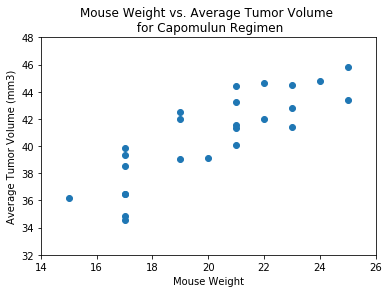

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_data = data_set["Drug Regimen"] == 'Capomulin'
capomulin_data_df = data_set[capomulin_data]

# Find the average tumor volume based on individual mouse data
mice_data_df = capomulin_data_df.groupby(["Mouse ID"])
weight = mice_data_df.mean()["Weight (g)"]
avg_tumor = mice_data_df.mean()["Tumor Volume (mm3)"]

# Plotting
plt.scatter(weight, avg_tumor)
plt.title("Mouse Weight vs. Average Tumor Volume \n for Capomulun Regimen")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlim(14,26)
plt.ylim(32, 48)

plt.show()

In [16]:
# Calculate the correlation coefficient 
corr = round(st.pearsonr(weight,avg_tumor)[0],2)

print(f"The correlation coefficient is {corr}.")

The correlation coefficient is 0.84.


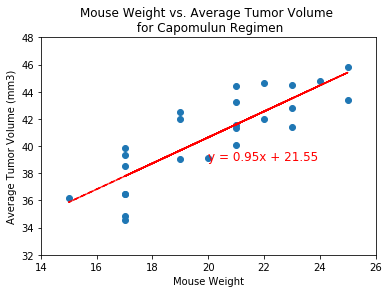

In [17]:
# and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_tumor)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plotting
plt.scatter(weight,avg_tumor)
plt.plot(weight,regress_values,"r--")
plt.annotate(line_eq,(20,39),fontsize=12,color="red")
plt.title("Mouse Weight vs. Average Tumor Volume \n for Capomulun Regimen")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlim(14,26)
plt.ylim(32, 48)
plt.show()